In [101]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# from sklearn import tree
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVR
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

In [98]:
dados = pd.read_csv("dados_artigo.csv",header=1)
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
y = np.array(dados["R(%)"])
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
Xs = preprocessing.StandardScaler()
Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)
# ys = preprocessing.StandardScaler()
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys.fit(y_train.reshape(-1, 1))
y_train_norm = ys.transform(y_train.reshape(-1, 1))
y_test_norm = ys.transform(y_test.reshape(-1, 1))
# print(y_test_norm.ravel())

svr = NuSVR(tol=1e-05,verbose=True,gamma="auto")
svr.fit(X_train_norm,y_train_norm.ravel())
svr.score(X_test_norm,y_test_norm.ravel())

[LibSVM].................*
optimization finished, #iter = 5510
epsilon = 0.014924
obj = -5.180638, rho = -0.639230
nSV = 104, nBSV = 62


0.9153475836015338

In [103]:
yp = svr.predict(X_test_norm)
res = pd.DataFrame()
res["dadosN"]=y_test_norm.ravel()
res["preditoN"] = yp
res["dadosO"] = y_test.ravel()
res["PreditoO"] = ys.inverse_transform(yp.reshape(-1, 1))
res

,dadosN,preditoN,dadosO,PreditoO
0,0.834865,0.855040,84.60,86.399559
1,0.961099,0.871405,95.86,87.859298
2,0.961547,0.951147,95.90,94.972275
3,0.572309,0.568783,61.18,60.865424
4,0.896637,0.784617,90.11,80.117831
5,0.869619,0.864041,87.70,87.202445
6,0.778812,0.736504,79.60,75.826132
7,0.911323,0.820148,91.42,83.287201
8,0.513229,0.535384,55.91,57.886261
9,0.884641,0.868933,89.04,87.638838


In [100]:
svr.score(X_train_norm,y_train_norm.ravel())

0.9111716793721288

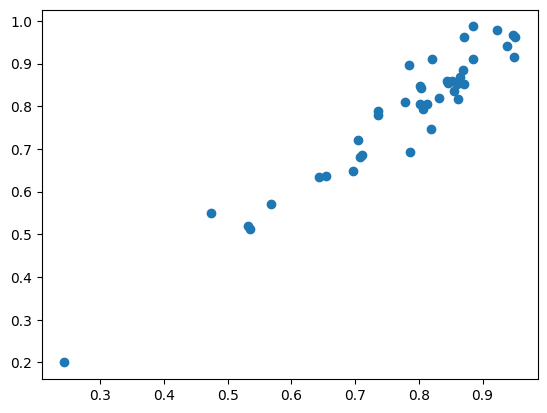

In [105]:
plt.scatter(yp,y_test_norm.ravel())